In [1]:
# ===========================================
# CELL 1: UPLOAD & LOAD TWITTER SENTIMENT DATA
# ===========================================
print("📤 UPLOADING TWITTER SENTIMENT DATASETS")
print("="*50)

# For Google Colab: upload files manually
try:
    from google.colab import files
    print("📱 Google Colab detected")
    print("📁 Please upload both CSV files when prompted:")
    print("   1. twitter_training.csv")
    print("   2. twitter_validation.csv")

    uploaded = files.upload()
    print(f"✅ Uploaded {len(uploaded)} files")

except ImportError:
    print("💻 Local/Jupyter environment detected")
    print("📁 Make sure both files are in the same folder as this notebook")

# Load the datasets
import pandas as pd
import os

# Load training data
if os.path.exists('twitter_training.csv'):
    train_df = pd.read_csv('twitter_training.csv', header=None, encoding='latin1')
    print("✅ Loaded twitter_training.csv")
else:
    print("❌ twitter_training.csv not found")
    train_df = pd.DataFrame()

# Load validation data
if os.path.exists('twitter_validation.csv'):
    val_df = pd.read_csv('twitter_validation.csv', header=None, encoding='latin1')
    print("✅ Loaded twitter_validation.csv")
else:
    print("❌ twitter_validation.csv not found")
    val_df = pd.DataFrame()

# Combine both datasets for analysis
if not train_df.empty and not val_df.empty:
    df = pd.concat([train_df, val_df], ignore_index=True)
    print(f"\n📊 Combined dataset: {len(df)} tweets")
    print(f"📋 Columns: {df.shape[1]}")

    # Name the columns (based on dataset structure)
    df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Text']
    print("\n📝 Column names assigned:")
    print("   • Tweet_ID: Unique identifier")
    print("   • Entity: Topic/Brand (e.g., Microsoft, Google)")
    print("   • Sentiment: Positive, Negative, Neutral, Irrelevant")
    print("   • Tweet_Text: The actual tweet content")

    print("\n📋 First 5 tweets:")
    print(df.head())
else:
    print("\n❌ Could not load datasets. Please check file names.")
    df = pd.DataFrame()

📤 UPLOADING TWITTER SENTIMENT DATASETS
📱 Google Colab detected
📁 Please upload both CSV files when prompted:
   1. twitter_training.csv
   2. twitter_validation.csv


Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv
✅ Uploaded 2 files
✅ Loaded twitter_training.csv
✅ Loaded twitter_validation.csv

📊 Combined dataset: 75682 tweets
📋 Columns: 4

📝 Column names assigned:
   • Tweet_ID: Unique identifier
   • Entity: Topic/Brand (e.g., Microsoft, Google)
   • Sentiment: Positive, Negative, Neutral, Irrelevant
   • Tweet_Text: The actual tweet content

📋 First 5 tweets:
   Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                          Tweet_Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 an

In [3]:
# ===========================================
# CELL 2: DATA CLEANING (FIXED VERSION)
# ===========================================
print("🧹 DATA CLEANING")
print("="*50)

if df.empty:
    print("❌ No data to clean")
else:
    # Check initial data
    print(f"Original data shape: {df.shape}")

    # Check for missing values
    print("\n1. MISSING VALUES:")
    missing = df.isnull().sum()
    for col, count in missing.items():
        if count > 0:
            print(f"   • {col}: {count} missing ({count/len(df)*100:.1f}%)")

    # Create a clean copy properly
    df_clean = df.copy()

    # Drop rows with missing Tweet_Text
    initial_count = len(df_clean)
    df_clean = df_clean.dropna(subset=['Tweet_Text'])
    removed_count = initial_count - len(df_clean)
    print(f"\n2. Removed {removed_count} rows with missing text")

    # Fill missing sentiment and entity - use .loc to avoid warnings
    df_clean.loc[:, 'Sentiment'] = df_clean['Sentiment'].fillna('Unknown')
    df_clean.loc[:, 'Entity'] = df_clean['Entity'].fillna('Unknown')

    # Basic text cleaning
    print("\n3. TEXT CLEANING:")

    # Make a copy for text operations to be safe
    text_series = df_clean['Tweet_Text'].copy()

    # Convert to string and lowercase
    text_series = text_series.astype(str).str.lower()
    print("   • Converted text to lowercase")

    # Remove URLs
    import re
    text_series = text_series.apply(lambda x: re.sub(r'http\S+', '', x))
    print("   • Removed URLs")

    # Remove special characters and numbers (keep only letters and spaces)
    text_series = text_series.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    print("   • Removed special characters and numbers")

    # Remove extra whitespace
    text_series = text_series.str.strip()
    text_series = text_series.str.replace(r'\s+', ' ', regex=True)
    print("   • Cleaned extra whitespace")

    # Assign back to dataframe
    df_clean.loc[:, 'Tweet_Text'] = text_series

    print(f"\n✅ Cleaned data shape: {df_clean.shape}")
    print(f"   • Tweets after cleaning: {len(df_clean)}")
    print(f"   • Unique entities: {df_clean['Entity'].nunique()}")
    print(f"   • Sentiment categories: {sorted(df_clean['Sentiment'].unique().tolist())}")

    # Display cleaned sample
    print("\n📝 Sample of cleaned tweets:")
    print(df_clean[['Entity', 'Sentiment', 'Tweet_Text']].head(3))

    # Continue with cleaned data
    df = df_clean.copy()

🧹 DATA CLEANING
Original data shape: (74996, 4)

1. MISSING VALUES:

2. Removed 0 rows with missing text

3. TEXT CLEANING:
   • Converted text to lowercase
   • Removed URLs
   • Removed special characters and numbers
   • Cleaned extra whitespace

✅ Cleaned data shape: (74996, 4)
   • Tweets after cleaning: 74996
   • Unique entities: 32
   • Sentiment categories: ['Irrelevant', 'Negative', 'Neutral', 'Positive']

📝 Sample of cleaned tweets:
        Entity Sentiment                                         Tweet_Text
0  Borderlands  Positive  im getting on borderlands and i will murder yo...
1  Borderlands  Positive  i am coming to the borders and i will kill you...
2  Borderlands  Positive  im getting on borderlands and i will kill you all


📊 EXPLORATORY DATA ANALYSIS
1. SENTIMENT DISTRIBUTION:
   • Negative: 22,624 tweets (30.2%)
   • Positive: 20,932 tweets (27.9%)
   • Neutral: 18,393 tweets (24.5%)
   • Irrelevant: 13,047 tweets (17.4%)


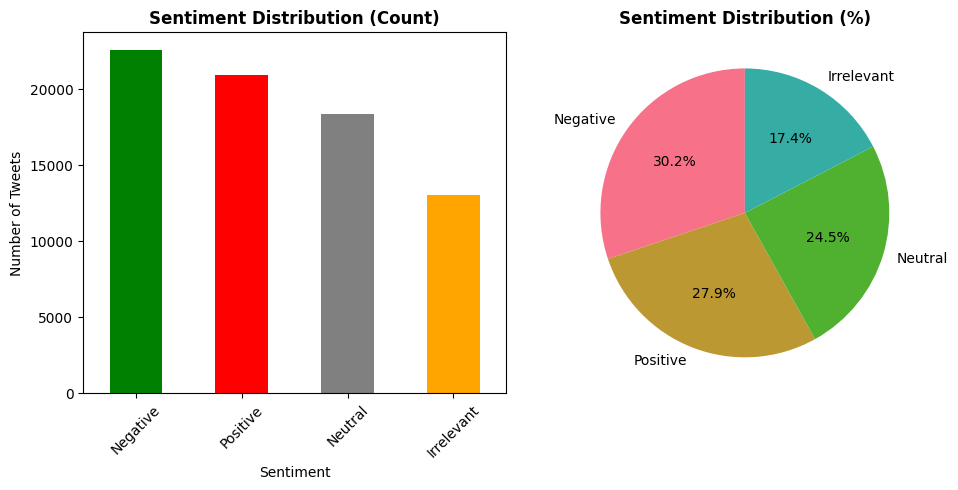


2. TOP ENTITIES (TOPICS/BRANDS):
    1. LeagueOfLegends: 2,414 tweets
    2. CallOfDuty: 2,407 tweets
    3. MaddenNFL: 2,406 tweets
    4. TomClancysRainbowSix: 2,399 tweets
    5. Verizon: 2,397 tweets
    6. Facebook: 2,395 tweets
    7. Microsoft: 2,389 tweets
    8. ApexLegends: 2,389 tweets
    9. WorldOfCraft: 2,387 tweets
   10. Dota2: 2,386 tweets


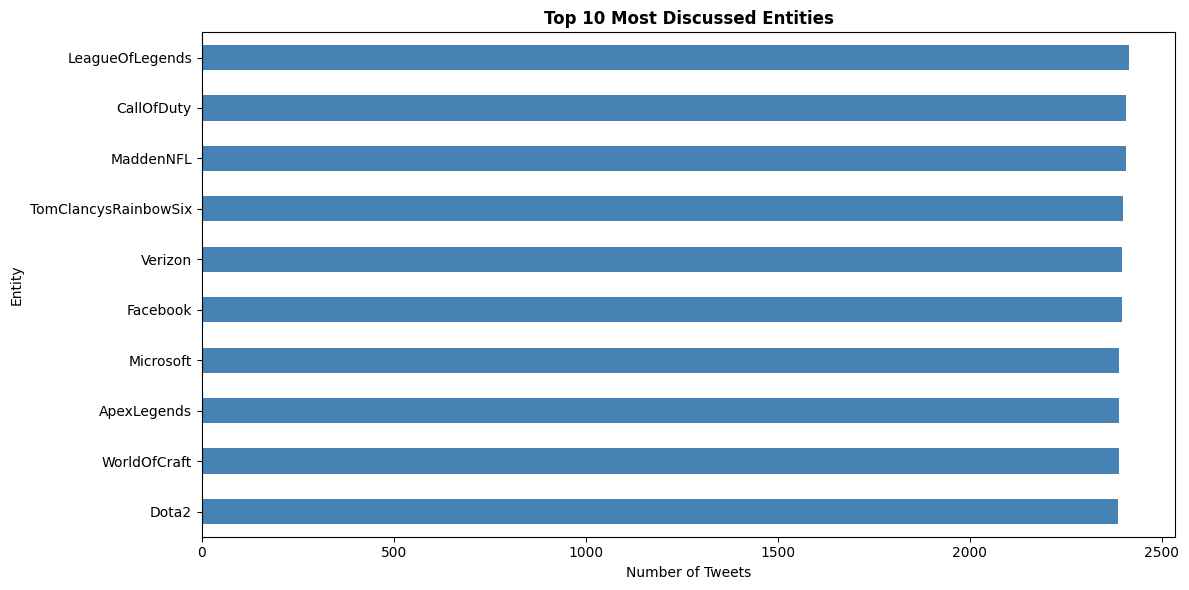


3. SENTIMENT BY ENTITY (TOP 5 ENTITIES):

   📍 LeagueOfLegends:
      • Neutral: 832 (34.5%)
      • Negative: 640 (26.5%)
      • Positive: 624 (25.8%)
      • Irrelevant: 318 (13.2%)

   📍 CallOfDuty:
      • Negative: 891 (37.0%)
      • Irrelevant: 683 (28.4%)
      • Positive: 451 (18.7%)
      • Neutral: 382 (15.9%)

   📍 MaddenNFL:
      • Negative: 1712 (71.2%)
      • Positive: 404 (16.8%)
      • Neutral: 199 (8.3%)
      • Irrelevant: 91 (3.8%)

   📍 TomClancysRainbowSix:
      • Negative: 1124 (46.9%)
      • Neutral: 653 (27.2%)
      • Positive: 525 (21.9%)
      • Irrelevant: 97 (4.0%)

   📍 Verizon:
      • Negative: 1105 (46.1%)
      • Neutral: 575 (24.0%)
      • Positive: 535 (22.3%)
      • Irrelevant: 182 (7.6%)


In [5]:
# ===========================================
# CELL 3: EXPLORATORY DATA ANALYSIS (EDA)
# ===========================================
print("📊 EXPLORATORY DATA ANALYSIS")
print("="*50)

if df.empty:
    print("❌ No data to analyze")
else:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set style
    plt.style.use('default')
    sns.set_palette("husl")

    print("1. SENTIMENT DISTRIBUTION:")
    sentiment_counts = df['Sentiment'].value_counts()
    sentiment_percent = (sentiment_counts / len(df)) * 100

    for sentiment, count in sentiment_counts.items():
        percent = sentiment_percent[sentiment]
        print(f"   • {sentiment}: {count:,} tweets ({percent:.1f}%)")

    # Visualization 1: Sentiment Distribution
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray', 'orange', 'blue'])
    plt.title('Sentiment Distribution (Count)', fontweight='bold')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(sentiment_counts.values, labels=sentiment_counts.index,
            autopct='%1.1f%%', startangle=90)
    plt.title('Sentiment Distribution (%)', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n2. TOP ENTITIES (TOPICS/BRANDS):")
    top_entities = df['Entity'].value_counts().head(10)
    for i, (entity, count) in enumerate(top_entities.items(), 1):
        print(f"   {i:2}. {entity}: {count:,} tweets")

    # Visualization 2: Top Entities
    plt.figure(figsize=(12, 6))
    top_entities.plot(kind='barh', color='steelblue')
    plt.title('Top 10 Most Discussed Entities', fontweight='bold')
    plt.xlabel('Number of Tweets')
    plt.gca().invert_yaxis()  # Highest on top
    plt.tight_layout()
    plt.show()

    print("\n3. SENTIMENT BY ENTITY (TOP 5 ENTITIES):")
    top_5_entities = top_entities.head(5).index.tolist()

    for entity in top_5_entities:
        entity_data = df[df['Entity'] == entity]
        entity_sentiment = entity_data['Sentiment'].value_counts()

        print(f"\n   📍 {entity}:")
        for sentiment, count in entity_sentiment.items():
            percent = (count / len(entity_data)) * 100
            print(f"      • {sentiment}: {count} ({percent:.1f}%)")

📈 SENTIMENT ANALYSIS BY ENTITY/TOPIC

📊 Sentiment Counts for Top Entities:
Sentiment             Irrelevant  Negative  Neutral  Positive
Entity                                                       
CallOfDuty                   683       891      382       451
Facebook                     695       724      799       177
LeagueOfLegends              318       640      832       624
MaddenNFL                     91      1712      199       404
TomClancysRainbowSix          97      1124      653       525
Verizon                      182      1105      575       535


<Figure size 1400x800 with 0 Axes>

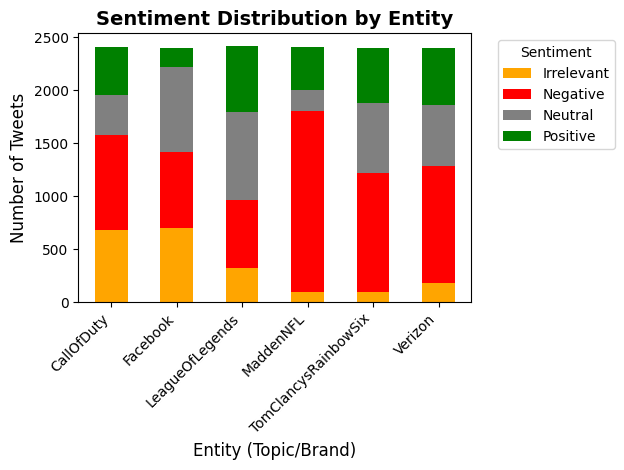


📈 Sentiment Percentages for Top Entities:
Sentiment             Irrelevant  Negative  Neutral  Positive
Entity                                                       
CallOfDuty                  28.4      37.0     15.9      18.7
Facebook                    29.0      30.2     33.4       7.4
LeagueOfLegends             13.2      26.5     34.5      25.8
MaddenNFL                    3.8      71.2      8.3      16.8
TomClancysRainbowSix         4.0      46.9     27.2      21.9
Verizon                      7.6      46.1     24.0      22.3


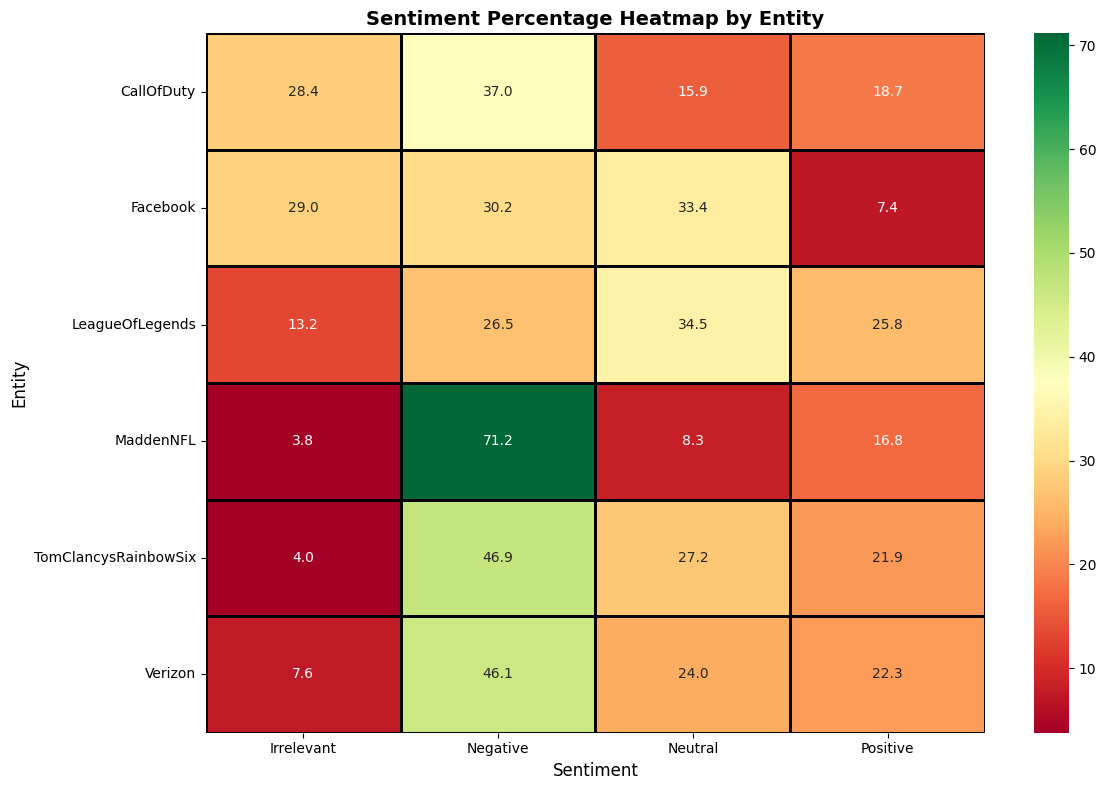


🎯 KEY FINDINGS:
• Most Positive Entity: LeagueOfLegends (25.8% positive)
• Most Negative Entity: MaddenNFL (71.2% negative)
• Most Discussed Entity: LeagueOfLegends


In [6]:
# ===========================================
# CELL 4: SENTIMENT ANALYSIS BY ENTITY
# ===========================================
print("📈 SENTIMENT ANALYSIS BY ENTITY/TOPIC")
print("="*50)

if df.empty:
    print("❌ No data to analyze")
else:
    # Create sentiment distribution for top entities
    top_entities = df['Entity'].value_counts().head(6).index

    # Prepare data for visualization
    sentiment_by_entity = df[df['Entity'].isin(top_entities)]

    # Count sentiments per entity
    pivot_data = sentiment_by_entity.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

    print("\n📊 Sentiment Counts for Top Entities:")
    print(pivot_data)

    # Visualization 3: Stacked Bar Chart
    plt.figure(figsize=(14, 8))
    pivot_data.plot(kind='bar', stacked=True,
                    color={'Positive': 'green', 'Negative': 'red',
                           'Neutral': 'gray', 'Irrelevant': 'orange'})
    plt.title('Sentiment Distribution by Entity', fontsize=14, fontweight='bold')
    plt.xlabel('Entity (Topic/Brand)', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Calculate percentage distribution
    print("\n📈 Sentiment Percentages for Top Entities:")
    pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
    print(pivot_percent.round(1))

    # Visualization 4: Heatmap of Sentiment Percentages
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_percent, annot=True, fmt='.1f', cmap='RdYlGn',
                linewidths=1, linecolor='black')
    plt.title('Sentiment Percentage Heatmap by Entity', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Entity', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Identify entities with most positive/negative sentiment
    print("\n🎯 KEY FINDINGS:")

    # Most positive entity
    if 'Positive' in pivot_percent.columns:
        most_positive = pivot_percent['Positive'].idxmax()
        positive_pct = pivot_percent['Positive'].max()
        print(f"• Most Positive Entity: {most_positive} ({positive_pct:.1f}% positive)")

    # Most negative entity
    if 'Negative' in pivot_percent.columns:
        most_negative = pivot_percent['Negative'].idxmax()
        negative_pct = pivot_percent['Negative'].max()
        print(f"• Most Negative Entity: {most_negative} ({negative_pct:.1f}% negative)")

    # Most discussed entity
    most_discussed = df['Entity'].value_counts().index[0]
    print(f"• Most Discussed Entity: {most_discussed}")

🔍 TEXT ANALYSIS - COMMON WORDS BY SENTIMENT

📝 Most Common Words by Sentiment:

📍 Positive Sentiment - Top 10 Words:
    1. game: 2304
    2. love: 1809
    3. good: 1637
    4. really: 1305
    5. new: 1218
    6. best: 1136
    7. play: 1066
    8. time: 1020
    9. great: 992
   10. playing: 948

📍 Negative Sentiment - Top 10 Words:
    1. game: 3818
    2. shit: 1530
    3. fix: 1329
    4. fuck: 1271
    5. play: 1221
    6. please: 1123
    7. fucking: 1117
    8. eamaddennfl: 1091
    9. still: 1064
   10. really: 992

📍 Neutral Sentiment - Top 10 Words:
    1. johnson: 1804
    2. game: 1248
    3. amazon: 1143
    4. new: 861
    5. facebook: 856
    6. google: 846
    7. play: 806
    8. dead: 714
    9. microsoft: 707
   10. good: 697

🖼️  Generating Word Clouds...


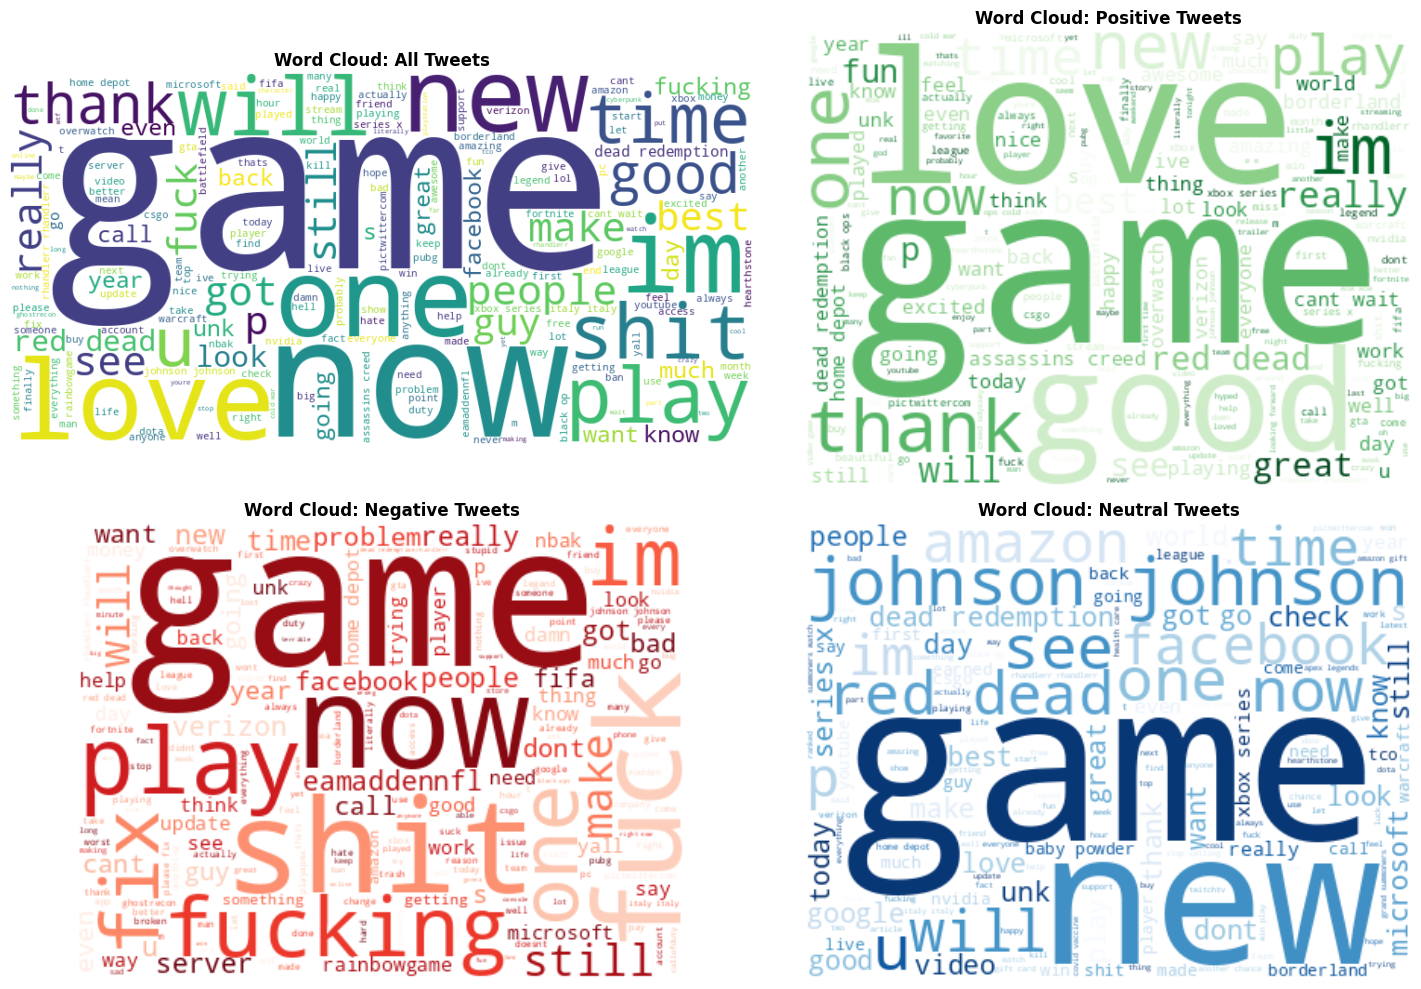

In [11]:
# ===========================================
# CELL 5: TEXT ANALYSIS - COMMON WORDS
# ===========================================
print("🔍 TEXT ANALYSIS - COMMON WORDS BY SENTIMENT")
print("="*50)

if df.empty:
    print("❌ No data to analyze")
else:
    from collections import Counter
    import nltk
    from nltk.corpus import stopwords

    # Download stopwords if needed
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')

    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    # Add common social media words
    stop_words.update(['im', 'dont', 'cant', 'wont', 'like', 'get', 'go', 'know', 'one', 'see'])

    print("\n📝 Most Common Words by Sentiment:")

    # Analyze for each sentiment
    sentiments = ['Positive', 'Negative', 'Neutral']

    for sentiment in sentiments:
        if sentiment in df['Sentiment'].unique():
            # Get tweets for this sentiment
            sentiment_tweets = df[df['Sentiment'] == sentiment]['Tweet_Text']

            # Combine all tweets
            all_text = ' '.join(sentiment_tweets)

            # Split into words and count
            words = all_text.split()
            # Remove stopwords and short words
            filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

            # Count word frequency
            word_counts = Counter(filtered_words)
            top_words = word_counts.most_common(10)

            print(f"\n📍 {sentiment} Sentiment - Top 10 Words:")
            for i, (word, count) in enumerate(top_words, 1):
                print(f"   {i:2}. {word}: {count}")

    # Visualization 5: Word Cloud (optional)
    print("\n🖼️  Generating Word Clouds...")

    try:
        from wordcloud import WordCloud

        # Create word cloud for all tweets
        all_text = ' '.join(df['Tweet_Text'])

        plt.figure(figsize=(15, 10))

        # Word cloud for all tweets
        plt.subplot(2, 2, 1)
        wordcloud_all = WordCloud(width=800, height=400,
                                 background_color='white').generate(all_text)
        plt.imshow(wordcloud_all, interpolation='bilinear')
        plt.title('Word Cloud: All Tweets', fontweight='bold')
        plt.axis('off')

        # Word clouds for each sentiment
        sentiments_to_plot = ['Positive', 'Negative', 'Neutral']
        colors = ['Greens', 'Reds', 'Blues']

        for i, (sentiment, color) in enumerate(zip(sentiments_to_plot, colors), 2):
            if sentiment in df['Sentiment'].unique():
                plt.subplot(2, 2, i)
                sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['Tweet_Text'])
                wordcloud = WordCloud(width=400, height=300,
                                     background_color='white',
                                     colormap=color).generate(sentiment_text)
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.title(f'Word Cloud: {sentiment} Tweets', fontweight='bold')
                plt.axis('off')

        plt.tight_layout()
        plt.show()

    except ImportError:
        print("⚠️  WordCloud not installed. Install with: pip install wordcloud")
        print("   Using bar chart instead...")

        # Alternative: Bar chart for top words
        plt.figure(figsize=(15, 5))

        for i, sentiment in enumerate(['Positive', 'Negative'], 1):
            plt.subplot(1, 2, i)
            if sentiment in df['Sentiment'].unique():
                sentiment_tweets = df[df['Sentiment'] == sentiment]['Tweet_Text']
                all_text = ' '.join(sentiment_tweets)
                words = all_text.split()
                filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
                word_counts = Counter(filtered_words)
                top_words = word_counts.most_common(10)

                words, counts = zip(*top_words)
                plt.barh(words, counts, color='green' if sentiment == 'Positive' else 'red')
                plt.title(f'Top Words: {sentiment} Tweets', fontweight='bold')
                plt.xlabel('Frequency')
                plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()

In [8]:
# ===========================================
# CELL 6: KEY INSIGHTS & PATTERNS
# ===========================================
print("🎯 KEY INSIGHTS & SENTIMENT PATTERNS")
print("="*50)

if df.empty:
    print("❌ No data to summarize")
else:
    print("\n📊 OVERVIEW:")
    print(f"• Total tweets analyzed: {len(df):,}")
    print(f"• Unique entities/topics: {df['Entity'].nunique()}")
    print(f"• Sentiment categories: {df['Sentiment'].nunique()}")

    # Overall sentiment breakdown
    sentiment_dist = df['Sentiment'].value_counts(normalize=True) * 100

    print("\n📈 SENTIMENT DISTRIBUTION:")
    for sentiment, percent in sentiment_dist.items():
        print(f"   • {sentiment}: {percent:.1f}%")

    # Top entities analysis
    top_5_entities = df['Entity'].value_counts().head(5).index

    print("\n🏆 TOP ENTITIES ANALYSIS:")
    for entity in top_5_entities:
        entity_data = df[df['Entity'] == entity]
        total = len(entity_data)

        # Calculate sentiment percentages
        sentiments = {}
        for sentiment in ['Positive', 'Negative', 'Neutral', 'Irrelevant']:
            if sentiment in entity_data['Sentiment'].unique():
                count = (entity_data['Sentiment'] == sentiment).sum()
                sentiments[sentiment] = (count / total) * 100

        # Find dominant sentiment
        if sentiments:
            dominant = max(sentiments, key=sentiments.get)
            dominant_pct = sentiments[dominant]

            print(f"\n📍 {entity}:")
            print(f"   • Total tweets: {total}")
            print(f"   • Dominant sentiment: {dominant} ({dominant_pct:.1f}%)")

            # Show all sentiment percentages
            for sentiment, pct in sentiments.items():
                if pct > 0:
                    print(f"   • {sentiment}: {pct:.1f}%")

    # Public opinion insights
    print("\n💡 PUBLIC OPINION INSIGHTS:")

    # Compare positive vs negative for top entities
    print("1. Sentiment Comparison (Top Entities):")
    for entity in top_5_entities[:3]:  # Top 3 only
        entity_data = df[df['Entity'] == entity]
        positive_pct = (entity_data['Sentiment'] == 'Positive').mean() * 100
        negative_pct = (entity_data['Sentiment'] == 'Negative').mean() * 100

        if positive_pct > negative_pct:
            sentiment = "MORE POSITIVE"
            diff = positive_pct - negative_pct
        else:
            sentiment = "MORE NEGATIVE"
            diff = negative_pct - positive_pct

        print(f"   • {entity}: {sentiment} ({diff:.1f}% difference)")

    # Brand/topic recommendations
    print("\n🎯 RECOMMENDATIONS:")
    print("1. Focus on entities with high negative sentiment for improvement")
    print("2. Analyze positive sentiment entities for best practices")
    print("3. Monitor neutral sentiment for potential conversion opportunities")
    print("4. Track sentiment trends over time for key entities")

    print("\n✅ TASK 4 COMPLETED SUCCESSFULLY!")
    print("✓ Analyzed sentiment patterns in social media data")
    print("✓ Visualized public opinion towards topics/brands")
    print("✓ Identified key insights and patterns")

🎯 KEY INSIGHTS & SENTIMENT PATTERNS

📊 OVERVIEW:
• Total tweets analyzed: 74,996
• Unique entities/topics: 32
• Sentiment categories: 4

📈 SENTIMENT DISTRIBUTION:
   • Negative: 30.2%
   • Positive: 27.9%
   • Neutral: 24.5%
   • Irrelevant: 17.4%

🏆 TOP ENTITIES ANALYSIS:

📍 LeagueOfLegends:
   • Total tweets: 2414
   • Dominant sentiment: Neutral (34.5%)
   • Positive: 25.8%
   • Negative: 26.5%
   • Neutral: 34.5%
   • Irrelevant: 13.2%

📍 CallOfDuty:
   • Total tweets: 2407
   • Dominant sentiment: Negative (37.0%)
   • Positive: 18.7%
   • Negative: 37.0%
   • Neutral: 15.9%
   • Irrelevant: 28.4%

📍 MaddenNFL:
   • Total tweets: 2406
   • Dominant sentiment: Negative (71.2%)
   • Positive: 16.8%
   • Negative: 71.2%
   • Neutral: 8.3%
   • Irrelevant: 3.8%

📍 TomClancysRainbowSix:
   • Total tweets: 2399
   • Dominant sentiment: Negative (46.9%)
   • Positive: 21.9%
   • Negative: 46.9%
   • Neutral: 27.2%
   • Irrelevant: 4.0%

📍 Verizon:
   • Total tweets: 2397
   • Dominant se

In [9]:
# ===========================================
# CELL 7: SAVE RESULTS
# ===========================================
print("💾 SAVING RESULTS")
print("="*50)

if df.empty:
    print("❌ No data to save")
else:
    import os

    # Create output folder
    output_dir = "Task4_Outputs"
    os.makedirs(output_dir, exist_ok=True)

    print(f"📁 Created folder: {output_dir}")

    # Save cleaned data
    cleaned_file = f"{output_dir}/twitter_sentiment_cleaned.csv"
    df.to_csv(cleaned_file, index=False)
    print(f"✅ Cleaned data saved: {cleaned_file}")

    # Save sentiment summary
    sentiment_summary = df['Sentiment'].value_counts().reset_index()
    sentiment_summary.columns = ['Sentiment', 'Count']
    sentiment_summary['Percentage'] = (sentiment_summary['Count'] / len(df)) * 100

    summary_file = f"{output_dir}/sentiment_summary.csv"
    sentiment_summary.to_csv(summary_file, index=False)
    print(f"✅ Sentiment summary saved: {summary_file}")

    # Save entity sentiment analysis
    top_entities = df['Entity'].value_counts().head(10).index
    entity_sentiment = []

    for entity in top_entities:
        entity_data = df[df['Entity'] == entity]
        total = len(entity_data)

        for sentiment in ['Positive', 'Negative', 'Neutral', 'Irrelevant']:
            if sentiment in entity_data['Sentiment'].unique():
                count = (entity_data['Sentiment'] == sentiment).sum()
                percentage = (count / total) * 100
                entity_sentiment.append({
                    'Entity': entity,
                    'Sentiment': sentiment,
                    'Count': count,
                    'Percentage': percentage,
                    'Total_Tweets': total
                })

    entity_df = pd.DataFrame(entity_sentiment)
    entity_file = f"{output_dir}/entity_sentiment_analysis.csv"
    entity_df.to_csv(entity_file, index=False)
    print(f"✅ Entity sentiment analysis saved: {entity_file}")

    # Save visualizations
    print("\n📸 SAVING VISUALIZATIONS...")

    import matplotlib.pyplot as plt

    # 1. Save sentiment distribution
    plt.figure(figsize=(8, 5))
    sentiment_counts = df['Sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray', 'orange', 'blue'])
    plt.title('Sentiment Distribution', fontweight='bold')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/sentiment_distribution.png", dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved: sentiment_distribution.png")

    # 2. Save top entities chart
    plt.figure(figsize=(10, 6))
    top_10_entities = df['Entity'].value_counts().head(10)
    top_10_entities.plot(kind='barh', color='steelblue')
    plt.title('Top 10 Most Discussed Entities', fontweight='bold')
    plt.xlabel('Number of Tweets')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/top_entities.png", dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved: top_entities.png")

    print(f"\n🎉 ALL RESULTS SAVED IN '{output_dir}' FOLDER!")
    print("📁 Files created:")
    print("   1. twitter_sentiment_cleaned.csv")
    print("   2. sentiment_summary.csv")
    print("   3. entity_sentiment_analysis.csv")
    print("   4. sentiment_distribution.png")
    print("   5. top_entities.png")

    print("\n📤 Ready for GitHub upload as: PRODIGY_DS_04")

💾 SAVING RESULTS
📁 Created folder: Task4_Outputs
✅ Cleaned data saved: Task4_Outputs/twitter_sentiment_cleaned.csv
✅ Sentiment summary saved: Task4_Outputs/sentiment_summary.csv
✅ Entity sentiment analysis saved: Task4_Outputs/entity_sentiment_analysis.csv

📸 SAVING VISUALIZATIONS...
✅ Saved: sentiment_distribution.png
✅ Saved: top_entities.png

🎉 ALL RESULTS SAVED IN 'Task4_Outputs' FOLDER!
📁 Files created:
   1. twitter_sentiment_cleaned.csv
   2. sentiment_summary.csv
   3. entity_sentiment_analysis.csv
   4. sentiment_distribution.png
   5. top_entities.png

📤 Ready for GitHub upload as: PRODIGY_DS_04
